# Background

This file loads the bike and train routes, and plots them on a blank matplotlib file. This is in order to generate a simple svg route which can be used in many places.


In [28]:
import gpxpy
import matplotlib.pyplot as plt

BIRMINGHAM_COORDS = (-1.9018053, 52.4765926)
CAMBRIDGE_COORDS = (0.1297757, 52.2149504)


## Import bike routes


In [29]:
bike_route_names = [
    "BHM_TO_STR",
    "BIC_TO_BED",
    "BED_TO_SAN"
]
bike_routes = {}
for route_name in bike_route_names:
    gpx_file = open(f"../data/bike/{route_name}.gpx", 'r')
    gpx = gpxpy.parse(gpx_file)
    bike_routes[route_name] = gpx.tracks[0].segments[0].points


## Import train routes


In [30]:
train_route_names = [
    "STR_TO_LEA",
    "LEA_TO_BIC",
    "SAN_TO_CAM"
]
train_routes = {}
for route_name in train_route_names:
    gpx_file = open(f"../data/train/{route_name}.gpx", 'r')
    gpx = gpxpy.parse(gpx_file)
    train_routes[route_name] = gpx.tracks[0].segments[0].points


## Plot


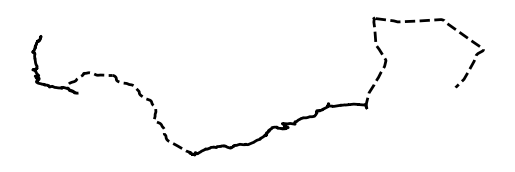

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

for route_name, route in bike_routes.items():
    xs = [point.longitude for point in route]
    ys = [point.latitude for point in route]
    ax.plot(xs, ys, 'k-', lw=2)

for route_name, route in train_routes.items():
    xs = [point.longitude for point in route]
    ys = [point.latitude for point in route]
    ax.plot(xs, ys, 'k--', lw=2)

ax.set_aspect('equal')
plt.axis('off')
plt.show()


## Save


In [32]:
fig.patch.set_visible(False)
fig.savefig('../images/route.svg', format='svg', dpi=1200, bbox_inches='tight')


# Plot with more info


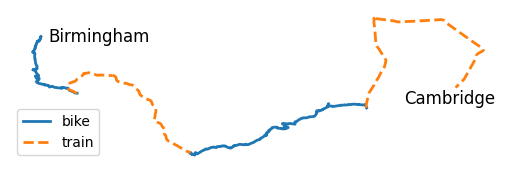

In [34]:
# plt.xkcd()
fig = plt.figure()
ax = fig.add_subplot(111)

bike_linestyle = {
    "color": "#1f77b4",
    "linewidth": 2,
    "linestyle": "-",
}

train_linestyle = {
    "color": "#ff7f0e",
    "linewidth": 2,
    "linestyle": "--",
}

for route_name, route in bike_routes.items():
    xs = [point.longitude for point in route]
    ys = [point.latitude for point in route]
    ax.plot(xs, ys, **bike_linestyle)

for route_name, route in train_routes.items():
    xs = [point.longitude for point in route]
    ys = [point.latitude for point in route]
    ax.plot(xs, ys, **train_linestyle)

# label start and end points
ax.text(
    BIRMINGHAM_COORDS[0] + 0.05,
    BIRMINGHAM_COORDS[1],
    "Birmingham",
    horizontalalignment='left',
    verticalalignment='center',
    fontsize=12,
)
ax.text(
    CAMBRIDGE_COORDS[0],
    CAMBRIDGE_COORDS[1],
    "Cambridge",
    horizontalalignment='center',
    verticalalignment='top',
    fontsize=12,
)

ax.set_aspect('equal')
# make custom legend with only "bike" and "train" lines
ax.legend(
    [
        plt.Line2D([0], [0], **bike_linestyle),
        plt.Line2D([0], [0], **train_linestyle),
    ],
    ["bike", "train"]
)
plt.axis('off')
plt.show()
fig.patch.set_visible(False)
fig.savefig('../images/route_descriptive.svg', format='svg',
            bbox_inches='tight')
